In [2]:
# Plot ad hoc mnist instances
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

### Loading the MNIST Dataset in Keras


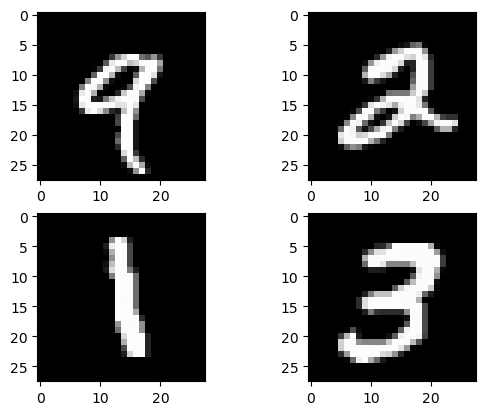

In [6]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[7], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

### Baseline Model with Multi-Layer Perceptrons


In [7]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [11]:
# define baseline model
def baseline_model():
 # create model
 model = Sequential()
 model.add(Dense(num_pixels, input_shape=(num_pixels,), kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [12]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

/home/campus21/msjojare/.conda/envs/cs4821/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
300/300 - 2s - 7ms/step - accuracy: 0.9216 - loss: 0.2774 - val_accuracy: 0.9569 - val_loss: 0.1475
Epoch 2/10
300/300 - 1s - 4ms/step - accuracy: 0.9684 - loss: 0.1088 - val_accuracy: 0.9702 - val_loss: 0.0972
Epoch 3/10
300/300 - 1s - 4ms/step - accuracy: 0.9796 - loss: 0.0701 - val_accuracy: 0.9775 - val_loss: 0.0775
Epoch 4/10
300/300 - 1s - 4ms/step - accuracy: 0.9860 - loss: 0.0493 - val_accuracy: 0.9791 - val_loss: 0.0703
Epoch 5/10
300/300 - 1s - 4ms/step - accuracy: 0.9901 - loss: 0.0350 - val_accuracy: 0.9797 - val_loss: 0.0653
Epoch 6/10
300/300 - 1s - 4ms/step - accuracy: 0.9929 - loss: 0.0258 - val_accuracy: 0.9800 - val_loss: 0.0633
Epoch 7/10
300/300 - 1s - 4ms/step - accuracy: 0.9953 - loss: 0.0191 - val_accuracy: 0.9816 - val_loss: 0.0613
Epoch 8/10
300/300 - 1s - 4ms/step - accuracy: 0.9969 - loss: 0.0136 - val_accuracy: 0.9801 - val_loss: 0.0604
Epoch 9/10
300/300 - 1s - 4ms/step - accuracy: 0.9981 - loss: 0.0099 - val_accuracy: 0.9825 - val_loss: 0.0584
E

### Simple Convolutional Neural Network for MNIST


In [13]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [14]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [16]:
def baseline_model():
 # create model
 model = Sequential()
 model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Dropout(0.2))
 model.add(Flatten())
 model.add(Dense(128, activation='relu'))
 model.add(Dense(num_classes, activation='softmax'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [17]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

/home/campus21/msjojare/.conda/envs/cs4821/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
300/300 - 4s - 14ms/step - accuracy: 0.9313 - loss: 0.2402 - val_accuracy: 0.9780 - val_loss: 0.0750
Epoch 2/10
300/300 - 3s - 11ms/step - accuracy: 0.9782 - loss: 0.0730 - val_accuracy: 0.9817 - val_loss: 0.0546
Epoch 3/10
300/300 - 3s - 10ms/step - accuracy: 0.9840 - loss: 0.0526 - val_accuracy: 0.9868 - val_loss: 0.0380
Epoch 4/10
300/300 - 3s - 10ms/step - accuracy: 0.9868 - loss: 0.0416 - val_accuracy: 0.9879 - val_loss: 0.0384
Epoch 5/10
300/300 - 3s - 10ms/step - accuracy: 0.9889 - loss: 0.0352 - val_accuracy: 0.9873 - val_loss: 0.0381
Epoch 6/10
300/300 - 3s - 10ms/step - accuracy: 0.9908 - loss: 0.0296 - val_accuracy: 0.9882 - val_loss: 0.0374
Epoch 7/10
300/300 - 3s - 10ms/step - accuracy: 0.9928 - loss: 0.0232 - val_accuracy: 0.9890 - val_loss: 0.0314
Epoch 8/10
300/300 - 3s - 11ms/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.9882 - val_loss: 0.0359
Epoch 9/10
300/300 - 3s - 10ms/step - accuracy: 0.9941 - loss: 0.0183 - val_accuracy: 0.9865 - val_loss:

### Larger Convolutional Neural Network for MNIST


In [19]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [20]:
# define the larger model
def larger_model():
 # create model
 model = Sequential()
 model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Conv2D(15, (3, 3), activation='relu'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 model.add(Dropout(0.2))
 model.add(Flatten())
 model.add(Dense(128, activation='relu'))
 model.add(Dense(50, activation='relu'))
 model.add(Dense(num_classes, activation='softmax'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [21]:
# build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7254 - loss: 0.8395 - val_accuracy: 0.9666 - val_loss: 0.1063
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9665 - loss: 0.1082 - val_accuracy: 0.9825 - val_loss: 0.0520
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9792 - loss: 0.0687 - val_accuracy: 0.9860 - val_loss: 0.0416
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9807 - loss: 0.0599 - val_accuracy: 0.9876 - val_loss: 0.0371
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9860 - loss: 0.0454 - val_accuracy: 0.9880 - val_loss: 0.0319
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9869 - loss: 0.0405 - val_accuracy: 0.9889 - val_loss: 0.0317
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9883 - loss: 0.0364 - val_accuracy: 0.9892 - val_loss: 0.0299
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9890 - loss: 0.0330 - val_accu